In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset1.csv")
#dataset2 = pd.read_csv("dataset2.csv")

C:\Users\marye\AppData\Local\Temp\ipykernel_2268\3353793815.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("dataset1.csv")


In [3]:
df=dataset.T

In [4]:
df.iloc[0,22283]="class"

In [5]:
df.columns = df.iloc[0]
df = df[1:]

In [6]:
df

"""Gene""",1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
"""GSM74239""",1565.090088,53.745251,483.366943,3044.492676,207.656006,1056.770508,354.069855,308.29892,155.99794,75.741669,...,466.0542297,59558.76172,61949.91016,59.35531998,36.87960815,109.5829315,32.87757111,34.0942688,35.35680771,BMD
"""GSM74240""",1793.823975,398.217529,318.695801,3614.121826,152.559189,865.037781,503.007385,105.13649,48.647903,137.839523,...,343.9833984,6001.11084,8947.362305,38.06629944,52.50474167,147.647934,14.42153072,32.84622574,22.45256615,ALS
"""GSM74241""",2058.331543,476.876739,233.067993,2816.378418,99.692139,653.934692,280.965088,251.758575,46.351135,204.119141,...,320.0222473,10012.01172,18654.59766,26.71109581,18.06955528,33.90327454,6.366034031,29.42777824,10.94925213,ALS
"""GSM74242""",2189.998047,285.281464,377.694519,2772.384033,133.170013,675.938416,366.094696,107.485481,121.237541,184.00235,...,496.9295349,20802.71289,20401.41016,32.49289703,32.55485153,79.79168701,47.88290787,19.10712051,10.46703815,ALS
"""GSM74243""",1900.703247,418.731476,336.891205,3105.177002,176.241089,701.245606,336.056915,58.071873,158.303772,105.792396,...,405.8520203,11937.94629,14897.82129,38.86144257,26.97820282,104.2972717,37.987957,21.75231934,11.82510853,ALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GSM121396""",1693.465332,400.810791,356.851776,3003.223389,147.968765,905.220154,397.064239,39.943672,161.248688,172.840561,...,329.8389893,34602.61719,28734.96289,24.44764137,45.95801926,81.7485199,5.616616726,91.7178421,10.49835205,JDM
"""GSM121397""",2706.814453,236.318222,272.176849,2283.870361,113.717995,1028.5625,334.782776,103.489769,429.438171,161.858307,...,109.3782578,19557.15039,15422.49512,12.05679607,14.94508934,50.77046967,19.03370285,50.15467834,6.116550922,JDM
"""GSM121398""",1790.876709,210.678696,219.225784,2240.99292,88.037178,910.993164,341.301422,293.709473,501.354889,120.607307,...,175.606842,19784.10547,16721.51953,14.26865292,11.12779427,37.63124084,7.431427479,5.092339993,10.69742489,JDM
"""GSM121399""",1854.699463,176.634094,224.363571,2219.368164,82.605988,1711.207397,442.881409,336.195465,479.007782,86.310921,...,293.9943237,24775.75586,16098.21484,22.11844444,24.36098099,36.24326706,9.871538162,49.61191559,11.16646767,JDM


Text(0, 0.5, 'Frequency')

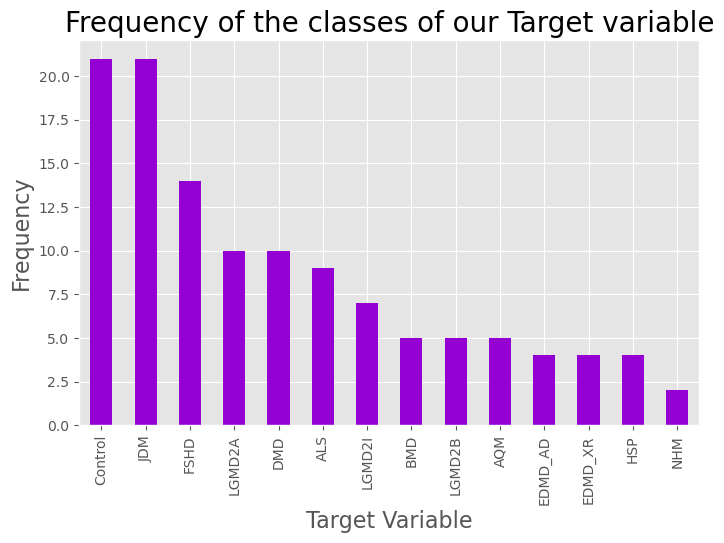

In [7]:
plt.style.use("ggplot")
df["class"].value_counts().plot(kind="bar", 
                                  figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable", size = 16)
plt.ylabel("Frequency", size = 16)

In [8]:
X = df.drop(columns=["class"], axis = 1)
y = df["class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [10]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [11]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [12]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 1730.684217
Feature 1: 892.563587
Feature 2: 1403.773559
Feature 3: 7507.274390
Feature 4: 647.571114
Feature 5: 5674.296572
Feature 6: 966.721968
Feature 7: 1339.053768
Feature 8: 13578.815320
Feature 9: 336.322908
Feature 10: 1008.762469
Feature 11: 16054.641944
Feature 12: 3172.577328
Feature 13: 8831.734647
Feature 14: 4100.802381
Feature 15: 3507.275546
Feature 16: 1539.671407
Feature 17: 786.327254
Feature 18: 17865.228265
Feature 19: 1903.473155
Feature 20: 5670.151426
Feature 21: 11898.508910
Feature 22: 89870.082011
Feature 23: 54083.346352
Feature 24: 5393.214784
Feature 25: 12451.957134
Feature 26: 39357.992629
Feature 27: 5294.184253
Feature 28: 7883.651652
Feature 29: 12455.841175
Feature 30: 74854.782456
Feature 31: 4364.953739
Feature 32: 186563.509730
Feature 33: 92235.899424
Feature 34: 13948.836726
Feature 35: 10056.145870
Feature 36: 37196.644487
Feature 37: 45821.891114
Feature 38: 211290.433861
Feature 39: 56710.481599
Feature 40: 6762.263080
Feature 41:

In [13]:
X_train.columns

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Hs28SrRNA-5_at', 'AFFX-r2-Hs28SrRNA-M_at',
       'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', name='"Gene"', length=22283)

In [14]:
def select_100_best_features(ls):
    features_index=[]
    index=0
    
    for i in range(0, 100): 
        max1 = 0
          
        for j in range(len(ls)):     
            if ls[j] > max1: 
                max1 = ls[j];
                index=j
            
                
                  
        ls.remove(max1); 
        features_index.append(index) 
          
    return features_index
    

In [15]:
f= fs.scores_.tolist()
features_index_selected = select_100_best_features(f)

In [16]:
newDf = pd.DataFrame()

In [17]:
for i in range (0,len(features_index_selected)):
    newDf.insert(i,"Feature"+str(i),df.iloc[:,features_index_selected[i]])

In [18]:
newDf.insert(len(features_index_selected),"class",df.iloc[:,-1])

C:\Users\marye\AppData\Local\Temp\ipykernel_2268\1313891535.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newDf.insert(len(features_index_selected),"class",df.iloc[:,-1])


In [19]:
newDf

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,class
"""GSM74239""",565.69696,760.888245,147.935211,38.24415588,466.545563,547.329773,672.632568,38397.18359,646.575317,673.946838,...,333.651398,2123.269043,859.12323,1215.685913,2823.351074,1156.71167,176.987427,67.330452,4212.326172,BMD
"""GSM74240""",393.929504,494.530853,131.412964,81.27355194,693.019592,1343.064209,859.708313,66.581398,957.575867,980.71991,...,280.848969,1634.380249,440.323242,1235.63916,2470.19873,1015.819946,82.329796,87.992554,2774.169678,ALS
"""GSM74241""",357.72052,607.642517,177.879623,34.96946716,616.797913,1362.53833,924.200134,619.015442,782.475891,739.94635,...,117.313202,1648.827271,287.508484,963.3046265,2464.968262,1037.641846,147.741989,52.202614,2501.833252,ALS
"""GSM74242""",446.257843,699.654724,206.611618,42.14086533,890.553284,1435.050659,988.339478,108.053909,980.179932,707.703735,...,213.867386,1860.11145,466.523651,1288.734253,1493.111572,1126.093262,117.595123,48.380856,4122.84375,ALS
"""GSM74243""",483.976593,626.522461,348.150208,142.7264709,595.964111,1511.766968,1223.72168,30.712168,906.597656,564.063171,...,219.40538,1989.056152,424.041412,1207.931519,1454.622925,1023.99176,57.261932,76.899681,3147.92334,ALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GSM121396""",7206.551758,636.623718,110.330826,41.2907486,1031.102417,1311.548096,552.293152,33617.74219,907.787781,577.092896,...,404.775635,1918.273071,315.740082,1253.104126,2568.88501,568.80603,110.915283,44.750671,11065.76367,JDM
"""GSM121397""",27098.45117,661.885498,218.241455,319.5622559,1053.511963,1300.283447,757.989746,19156.97852,1022.687805,715.034485,...,426.423706,1344.06897,212.570404,764.0602417,3733.298096,406.78186,43.070473,40.804432,15815.78809,JDM
"""GSM121398""",21469.83789,630.318909,224.246597,48.46534729,607.176514,1497.209961,732.311157,22886.46094,714.690979,749.602051,...,204.409531,1508.890381,156.233231,485.8503723,2344.074463,530.539246,81.798141,159.13179,8244.175781,JDM
"""GSM121399""",34899.86328,854.252685,267.066498,49.31154633,491.067719,650.406189,925.088379,25157.36523,1201.253174,634.108337,...,260.585022,1217.507324,146.44931,726.4646606,2723.394043,777.807068,112.308296,211.172974,7889.815918,JDM


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

In [21]:
x = newDf.drop(columns=["class"], axis = 1)
y = newDf["class"]

In [24]:
k = 10
NMDmodel = SVC(kernel='linear', random_state = 1)
kf = KFold(n_splits=k, random_state=None)
acc_score = []
for train_index , test_index in kf.split(x):
    X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
    Y_train , Y_test = y[train_index] , y[test_index]
    NMDmodel.fit(X_train,Y_train)
    pred_values = NMDmodel.predict(X_test)
    acc = accuracy_score(Y_test,pred_values)
    acc_score.append(acc)
     


In [25]:
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.07692307692307693, 0.0, 0.16666666666666666, 0.25, 0.0, 0.25, 0.4166666666666667, 0.4166666666666667, 1.0, 1.0]
Avg accuracy : 0.3576923076923077


In [26]:
#y_test["predictions"] = pred_values
Y_test

"GSM121389"     JDM
"GSM121390"     JDM
"GSM121391"     JDM
"GSM121392"     JDM
"GSM121393"     JDM
"GSM121394"     JDM
"GSM121395"     JDM
"GSM121396"     JDM
"GSM121397"     JDM
"GSM121398"     JDM
"GSM121399"     JDM
"GSM121407"    FSHD
Name: class, dtype: object

In [27]:
pred_values

array(['JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM',
       'JDM', 'JDM', 'FSHD'], dtype=object)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_values)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM: ", accuracy)


Accuracy Of SVM:  1.0


In [29]:
train_predictions = NMDmodel.predict(X_train)
test_predictions = NMDmodel.predict(X_test)


In [30]:

# Calculate the accuracy of the model on the training and testing sets
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)


In [31]:
print("Training accuracy:", train_accuracy * 100 ,"%")
print("Testing accuracy:", test_accuracy* 100 ,"%")

# Compare the training and testing accuracy
if train_accuracy > test_accuracy:
    print("The model may be overfitting the training data.")
else:
    print("The model is not overfitting the training data.")

Training accuracy: 100.0 %
Testing accuracy: 100.0 %
The model is not overfitting the training data.


In [32]:
X_train

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99
"""GSM74239""",565.69696,760.888245,147.935211,38.24415588,466.545563,547.329773,672.632568,38397.18359,646.575317,673.946838,...,84.623978,333.651398,2123.269043,859.12323,1215.685913,2823.351074,1156.71167,176.987427,67.330452,4212.326172
"""GSM74240""",393.929504,494.530853,131.412964,81.27355194,693.019592,1343.064209,859.708313,66.581398,957.575867,980.71991,...,163.423462,280.848969,1634.380249,440.323242,1235.63916,2470.19873,1015.819946,82.329796,87.992554,2774.169678
"""GSM74241""",357.72052,607.642517,177.879623,34.96946716,616.797913,1362.53833,924.200134,619.015442,782.475891,739.94635,...,274.562622,117.313202,1648.827271,287.508484,963.3046265,2464.968262,1037.641846,147.741989,52.202614,2501.833252
"""GSM74242""",446.257843,699.654724,206.611618,42.14086533,890.553284,1435.050659,988.339478,108.053909,980.179932,707.703735,...,262.222687,213.867386,1860.11145,466.523651,1288.734253,1493.111572,1126.093262,117.595123,48.380856,4122.84375
"""GSM74243""",483.976593,626.522461,348.150208,142.7264709,595.964111,1511.766968,1223.72168,30.712168,906.597656,564.063171,...,157.005035,219.40538,1989.056152,424.041412,1207.931519,1454.622925,1023.99176,57.261932,76.899681,3147.92334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GSM121384""",20424.69922,636.624512,226.858231,27.81116295,1129.037354,1431.753052,1067.502075,28418.31836,768.139954,556.828674,...,299.540588,438.086762,1896.235596,314.771973,653.3099365,3286.485596,881.887512,107.781578,186.982742,10470.48633
"""GSM121385""",23461.92188,1114.125488,220.564987,87.98840332,1140.38208,2368.810547,590.931885,19696.57227,815.019348,452.345673,...,263.568481,396.453583,2005.481201,237.259064,738.8902588,2596.7229,1441.276245,111.473038,183.327942,9691.182617
"""GSM121386""",25893.73828,930.460632,211.53682,103.6901321,894.812195,1156.265381,706.653992,29481.64844,759.759033,722.020752,...,306.076263,405.278565,1696.89856,307.139221,648.9783325,2736.551758,1029.239868,62.224564,81.134277,11996.07617
"""GSM121387""",28247.25586,723.029236,317.976501,44.15769958,636.009705,1286.097778,863.324158,31698.59961,978.82666,550.687988,...,341.41217,388.099915,1371.270386,327.703796,826.9953613,2682.730713,687.888062,107.911316,121.634842,6886.092773


In [33]:
X_test

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99
"""GSM121389""",39506.61328,508.911407,278.592071,54.49745941,439.903046,2150.076172,719.395935,26090.0293,800.276916,646.984192,...,472.186432,252.277084,1617.968872,243.86203,970.5691528,2046.957397,321.339294,103.830193,51.283062,4380.490723
"""GSM121390""",19483.83984,729.383057,607.792541,232.0521851,1147.277466,1776.891968,640.333252,22977.72656,643.242432,1146.771729,...,472.574646,244.382904,1503.693237,120.499092,665.2706909,4090.51001,584.326904,93.053993,95.016396,5514.211426
"""GSM121391""",23890.04102,1019.566833,105.000404,146.4683533,801.123962,1234.914917,780.263855,22203.61719,1068.355713,559.54895,...,329.44342,413.915253,1639.743652,305.359924,887.0719604,3872.942383,1156.587891,36.548779,218.294174,7092.985352
"""GSM121392""",31060.54492,384.237671,377.516632,34.36400986,430.63736,965.294373,563.538696,26138.99609,514.316223,1500.165894,...,768.08313,167.748001,1233.859741,234.252441,536.0183105,3819.09375,299.57254,137.24852,31.736679,5976.271484
"""GSM121393""",41436.52344,268.832153,98.531548,36.4022789,353.220215,1002.408569,745.367493,40546.50781,670.15094,918.128113,...,420.686676,377.22171,1498.033569,135.886902,1294.748047,2193.826904,272.970398,70.78492,220.546463,4682.749023
"""GSM121394""",31174.19336,928.282288,351.180237,53.78766632,684.109558,912.827393,908.687134,31851.4707,781.079834,505.781921,...,351.477753,298.071625,2200.433838,268.464447,687.7168579,1706.181396,1227.921265,121.427269,194.694016,8208.84375
"""GSM121395""",17615.11523,474.134277,143.479507,60.383358,601.842529,2397.580322,604.272644,33858.07813,555.260254,1116.69751,...,438.786987,271.371277,1641.993042,184.791656,1314.56897,1562.773071,402.060364,121.846786,170.185318,6945.424805
"""GSM121396""",7206.551758,636.623718,110.330826,41.2907486,1031.102417,1311.548096,552.293152,33617.74219,907.787781,577.092896,...,324.662659,404.775635,1918.273071,315.740082,1253.104126,2568.88501,568.80603,110.915283,44.750671,11065.76367
"""GSM121397""",27098.45117,661.885498,218.241455,319.5622559,1053.511963,1300.283447,757.989746,19156.97852,1022.687805,715.034485,...,480.877808,426.423706,1344.06897,212.570404,764.0602417,3733.298096,406.78186,43.070473,40.804432,15815.78809
"""GSM121398""",21469.83789,630.318909,224.246597,48.46534729,607.176514,1497.209961,732.311157,22886.46094,714.690979,749.602051,...,232.291977,204.409531,1508.890381,156.233231,485.8503723,2344.074463,530.539246,81.798141,159.13179,8244.175781
